# **Project Name**    -



##### **Project Type**    - Regression


##### **Akanksha Joshi - Individual**

# **Project Summary -**

We know how Ola and Uber have brought revolution in the mobility and transportation industry by supplying Cabs, however providing rental bikes is much better option as this is much cost effective compared to the rental cab services and also fit for the solo travellers and protects environment.

This should be much promoted for welfare of the society economically, environmental wise, time saviour and for that we need to have a check if enough bikes will be available as per growing demand in the market.

Here is a project that provides solution for the above problem. primary objective of this project is to develop a predictive model capable of forecasting the number of bikes needed for users in each hour. This model will leverage the past data and incorporate various factors such as time of day, weather conditions, and seasonal variations to accurately predict bike demand patterns.

To address this challenge, I have been given datasets containing essential features, such as Date, Rented Bike counts, hour, Temperature, Rainfall, Snowfall, Seasons, and more. My task involves exploring and analyzing this data, including data cleaning, duplicate removal, and feature engineering, to create meaningful predictors for the predictive model.

The successful implementation of the predictive model will empower rental bike services to offer bikes when and where the public needs them the most, leading to reduced waiting times and enhanced mobility comfort for urban residents. Moreover, this approach can encourage more individuals to adopt sustainable transportation options, contributing to a greener and more efficient urban environment.

In addition, the bike sharing demand prediction project focuses on creating a machine learning model that accurately forecasts bike sharing demand based on multiple features, such as temperature, hour of the day, humidity, functioning day, and season. The ultimate goal is to help bike sharing companies optimize their operations, allocate resources efficiently, and enhance the overall user experience.

Throughout the project, critical steps were undertaken, starting with data collection from reliable sources, including historical bike sharing demand data and relevant features. The collected data underwent rigorous preprocessing, handling missing values, outliers, and inconsistencies. Furthermore, exploratory data analysis was conducted to gain insights into the data and identify patterns and trends that might impact bike sharing demand.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**To provide a regression model for predection of bike needed every hour as per season, weather condition, weekoff etc.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

from datetime import datetime
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/data/SeoulBikeData.csv',encoding = 'unicode_escape')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

### Dataset Information

In [ ]:
# Dataset Info
df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

Data has no Duplicate Values

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

In [ ]:
# Visualizing the missing values

sns.heatmap(df.isnull())

### What did you know about your dataset?

The dataset consists of 14 rows and 8760 columns.
Among these columns, 4 are of integer type, 4 are of object type, and 6 are of float type.There are no missing or null values and there are no duplicate rows in the dataset.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

In [ ]:
# Dataset Describe
df.describe()

### Variables Description

**Date** : The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, **type : str**, we need to convert into **datetime format**.

**Rented Bike Count** : Number of rented bikes per hour which our **dependent variable** and we need to predict that, **type : int**

**Hour**: The hour of the day, starting from 0-23 it's in a digital time format, **type : int**, we need to convert it into **category data type**.

**Temperature(°C)**: Temperature in Celsius, **type : Float**

**Humidity(%)**: Humidity in the air in %, **type : int**

**Wind speed (m/s)** : Speed of the wind in m/s, **type : Float**

**Visibility (10m)**: Visibility in m, **type : int**

**Dew point temperature(°C)**: Temperature at the beggining of the day, **type : Float**

**Solar Radiation (MJ/m2)**: Sun contribution, **type : Float**

**Rainfall(mm)**: Amount of raining in mm, **type : Float**

**Snowfall (cm)**: Amount of snowing in cm, **type : Float**

**Seasons**: Season of the year, **type : str**, there are only 4 season's in data *.

**Holiday**: If the day  is holiday period or not, **type: str**

**Functioning Day**: If the day is a Functioning Day or not, **type : str**

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Converting the column Date to datetime format
df['Date']=df['Date'].apply(lambda x : dt.datetime.strptime(x,'%d/%m/%Y'))


In [ ]:
# creating 2 new columns months and days from date columns
df['Year'] = df['Date'].dt.year
df['Months'] = df['Date'].dt.month
df['Days'] = df['Date'].dt.day_name()

In [ ]:
def week (day) :
  if day=='Saturday' or day=='Sunday' :
    return 1
  else :
    return 0

In [ ]:
df['weekday-0/weekend-1']= df['Days'].apply(week)

In [ ]:
df.head()

HANDLING OUTLIERS :

 Outliers are data points that deviate significantly from the majority of other data points in a dataset. These data points lie far away from the central tendency of the data, either on the higher or lower end of the value range

In [ ]:
possible_outlier_columns = list(set(df.describe().columns)-{'Rented Bike Count','Hour','Year','Months','weekday-0/weekend-1'})
possible_outlier_columns

In [ ]:
plt.figure(figsize=(10,7))
for index,item in enumerate(possible_outlier_columns):
  plt.subplot(2,4,index+1)
  sns.boxplot(x=df[item], data=df)

In [ ]:
Col_with_outliers = ['Snowfall (cm)','Solar Radiation (MJ/m2)','Rainfall(mm)','Wind speed (m/s)']
Col_with_outliers

In [ ]:
outlier=pd.DataFrame(columns=['Name','lower_limit','upper_limit','Inter-quartile-range','No_of_outliers'])

In [ ]:
def lower (col) :
  q1=np.percentile(col,25)
  q3=np.percentile(col,75)
  iqr=q3-q1
  ll=q1-(1.5*iqr)
  return ll

In [ ]:
def upper (col) :
  q1=np.percentile(col,25)
  q3=np.percentile(col,75)
  iqr=q3-q1
  ul=q3+(1.5*iqr)
  return ul

In [ ]:
def iqr (col) :
  q1=np.percentile(col,25)
  q3=np.percentile(col,75)
  iqr=q3-q1

  return iqr

In [ ]:
def num (col) :
  ll=lower(col)
  ul=upper(col)
  count=0

  for i in col :
    if i<ll or i>ul:
      count=count+1

  return count


In [ ]:
for i in Col_with_outliers :
  outlier=outlier.append({'Name': i,'lower_limit' : lower(df[i]),'upper_limit' : upper(df[i]),'Inter-quartile-range' : iqr(df[i]),'No_of_outliers' : num(df[i])},ignore_index=True)

In [ ]:
outlier


In [ ]:
df['Solar Radiation (MJ/m2)'] = df['Solar Radiation (MJ/m2)'][~((df['Solar Radiation (MJ/m2)'] < lower(df['Solar Radiation (MJ/m2)'])) | (df['Solar Radiation (MJ/m2)'] > upper(df['Solar Radiation (MJ/m2)'])))]
df['Wind speed (m/s)'] = df['Wind speed (m/s)'][~((df['Wind speed (m/s)'] < lower(df['Wind speed (m/s)'])) | (df['Wind speed (m/s)'] > upper(df['Wind speed (m/s)'])))]

In [ ]:
df.isna().sum()

In [ ]:
df['Solar Radiation (MJ/m2)'].fillna(df['Solar Radiation (MJ/m2)'].median(),inplace=True)
df['Wind speed (m/s)'].fillna(df['Wind speed (m/s)'].median(),inplace=True)


In [ ]:
df.info()

### What all manipulations have you done and insights you found?

1. Initially, we convert the data type of the 'Date' column from **object to datetime** to facilitate the time-based operation and analysis.
2. Subsequently, we generate three new columns named **'Year', 'Month', and 'Day'** based on the 'Date' column.
3. The 'Day' column encompasses all the days of the month, and we create a new column named **'Weekdays-0/Weekend-1' where we designate Saturdays and Sundays as 0, and the remaining days as 1.**
4. Employed box plots to visualize the distribution of numerical variables and identify potential outliers

Outlier observations :

We see that Data like Snowfall, Solar Radiation, rainfall and wind speed have lot of outliers.
It is obvious because these values will have extremes during their peak season.
We should also not completely avoid them because they give us the maxmum potential they reach in peak seasons and what is their effect on bike rents.


By checking the Inter-Quaartile range of the above variables below data was found :

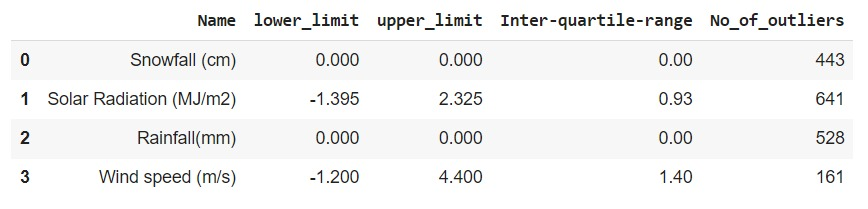


From the data we derrive that all the values for Snowfall and Rainfall except 0 is coming out as outlier and hence we can not remove those values. Because we will otherwise be left with only 1 value that is 0 for these parameters.

However, we have removed outliers from the columns Wind speed and Solar Radiation using Inter Quartile range method.

161 and 641 values were Removed from Wind speed and Solar Radiation Data respectively.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
sns.barplot(data=df,x='Months',y='Rented Bike Count')
plt.title('Rented bike each month count')

##### 1. Why did you pick the specific chart?

This Bar Chart helps analyse categorical data and comparision.

##### 2. What is/are the insight(s) found from the chart?

We can see from the chart that the bike rents are increased from month 3 and reach peak by month 6 (june) however there are low no of bikes rented after month 11(Nov) continued in Month 1 and 2 (Jan and Feb).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As there are low no of bikes rented during winters the possible reason may be in cold weather people might be prefering Cabs or other mode of transportation.

different schemes can be launched to increase business in winters also there can be such R&D that people dont feel cold while riding bikes in winters

There is rise in bike rents in months 4,5,6,7 and 8. we can make sure to keep more no of bikes available and increase surcharge rates on advance booking of bikes to have profit business

#### Chart - 2

In [ ]:
# Chart - 2 visualization code
plt.pie(df['Rented Bike Count'].groupby(df['weekday-0/weekend-1']).sum(),labels=['Weekday','Weekend'],autopct='%2.2f%%')
plt.show()

##### 1. Why did you pick the specific chart?

To compare with the categorical data in percentage.

##### 2. What is/are the insight(s) found from the chart?

More Bikes are rented in weekday this maybe because people use the bikes to go to office.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Weekend Schemes can be released to increase business in weekends

#### Chart - 3

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(10,5))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='weekday-0/weekend-1')
plt.title('Count of Rented bikes acording to weekend and weekenday ')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

A point plot is used to visualize data points along two-dimensional axes, aiding in data distribution and comparison between groups. It helps display trends over time.

##### 2. What is/are the insight(s) found from the chart?

More no of bikes are rented during 6 AM to 10 AM and 4 PM to 7 PM. This might be because of office timings, more number of people renting bikes for office travel.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Prebookings can be made for better availability and improved business.

#### Chart - 4

In [ ]:
# Chart - 4 visualization code
plt.pie(df['Rented Bike Count'].groupby(df['Functioning Day']).sum(),labels=['Holiday','Functioning Day'],autopct='%2.2f%%')
plt.show()

##### 2. What is/are the insight(s) found from the chart?

Maybe there is no data recorded for Holidays because it might not be possible that there was 0 bike rented for all the holidays.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Data needs to be checked for Holiday's Bike rentals

#### Chart - 5

In [ ]:
x=df['Rented Bike Count'].groupby(df['Seasons']).sum().reset_index()
x['pl']=x['Rented Bike Count']/100000

In [ ]:
# Chart - 5 visualization code
plt.bar(x['Seasons'],x['pl'])
plt.title('Bikes Rented Season wise in Lacks')
plt.xlabel('Seasons')
plt.ylabel('Bikes Rented in Lacks')
plt.show()


##### 1. Why did you pick the specific chart?

A bar graph is used to visually represent categorical data by showing the frequency or value of each category as bars, making it easy to compare and understand the distribution of data. It is an effective tool for displaying discrete data and identifying patterns or trends among different categories.

##### 2. What is/are the insight(s) found from the chart?

Very few bikes rented in winters.

#### Chart - 6

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(10,5))

plt.bar(x= df['Temperature(°C)'], height= df['Rented Bike Count'],width=0.5)
plt.show()

##### 2. What is/are the insight(s) found from the chart?

More bikes rented at temperature 20-30

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We need to check more parameters

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

plt.bar(x= df['Snowfall (cm)'], height= df['Rented Bike Count'],width=0.5)
plt.show()

#### Chart - 8

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(10,5))

plt.bar(x= df['Rainfall(mm)'], height= df['Rented Bike Count'],width=0.5)
plt.show()

#### Chart - 9

In [ ]:
# Chart - 9 visualization code
humidity_bike = df.groupby('Humidity(%)')['Rented Bike Count'].mean().reset_index()

#Plotting a visualisation for the different humidity percentages
plt.plot(humidity_bike['Humidity(%)'],humidity_bike['Rented Bike Count'])
plt.xlabel('Humidity(%)')
plt.ylabel("Rented Bike Count")
plt.title("Rented bikes count across different humidity percentages")
plt.show()

#### Chart - 10

In [ ]:
# Chart - 10 visualization code
plt.bar(x= df['Visibility (10m)'], height= df['Rented Bike Count'],width=0.5)
plt.show()

#### Chart - 11 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart chosen in this case is a correlation heatmap using seaborn library, which is used to visualize the correlation between pairs of numerical variables in a matrix format. Each cell in the heatmap represents the correlation coefficient between two variables, with color indicating the strength and direction of the correlation.

##### 2. What is/are the insight(s) found from the chart?

*  Humidity has low correlation with visibility due to solar radiation.
*  Dew point temperature and temperature are highly related.  

#### Chart - 12 - Regression Plot

In [ ]:
# Regression Plot visualization code
plt.figure(figsize=(20,30))
for col in list(set(df.describe())):
  plt.subplot(7,2,list(set(df.describe())).index(col)+1)
  sns.regplot(x=df[col],y=df['Rented Bike Count'],scatter_kws={"color": 'Orange'}, line_kws={"color": "black"})
  corr=df[col].corr(df['Rented Bike Count'])
  #ax.set_title(col+'vs Rented Bike Count - correlation:'+str(corr))

##### 1. Why did you pick the specific chart?

A regression plot is used to visualize the relationship between two continuous variables by fitting a linear regression line to the data points, making it helpful for understanding the overall trend and predicting future values based on the relationship between the variables.

##### 2. What is/are the insight(s) found from the chart?

Temperature shows positive correlation with rented bikes.

Rainfall shows negetive correlation with rented bikes.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

significant relationship between weather conditions (temperature, humidity, wind speed)

### Hypothetical Statement -1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant relationship between weather conditions Temperature and bike sharing demand.

Alternative Hypothesis (Ha): There is a significant relationship temperature and bike sharing demand.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

# Extract temperature and bike sharing demand columns
temperature = df['Temperature(°C)']
bike_demand = df['Rented Bike Count']

# Perform Pearson's correlation coefficient test
corr, p_value = stats.pearsonr(temperature, bike_demand)

# Set the significance level (alpha)
alpha = 0.05

# Print the results
print("Pearson's correlation coefficient: {:.2f}".format(corr))
print("p-value: {:.4f}".format(p_value))

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between temperature and bike sharing demand.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between temperature and bike sharing demand.")

##### Which statistical test have you done to obtain P-Value?

The statistical test used in the example code provided is Pearson's correlation coefficient test, which is a measure of the linear relationship between two variables. The resulting p-value from this test is used to determine the significance of the correlation between temperature and bike sharing demand.

##### Why did you choose the specific statistical test?

t is widely used for assessing the strength and direction of a linear relationship between two variables. It provides a numerical value (r) that ranges from -1 to 1, where -1 indicates a perfect negative linear relationship, 1 indicates a perfect positive linear relationship, and 0 indicates no linear relationship. This makes it easy to interpret and understand the strength and direction of the relationship between temperature and bike sharing demand.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant relationship between Humidity and bike sharing demand.

Alternative Hypothesis (Ha): There is a significant relationship between Humidity and bike sharing demand.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Extract Humidity and bike sharing demand columns
humidity = df['Humidity(%)']

# Perform Pearson's correlation coefficient test
corr, p_value = stats.pearsonr(humidity, bike_demand)

# Set the significance level (alpha)
alpha = 0.05

# Print the results
print("Pearson's correlation coefficient: {:.2f}".format(corr))
print("p-value: {:.4f}".format(p_value))

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between Humidity and bike sharing demand.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between Humidity and bike sharing demand.")

A correlation coefficient of -0.20 indicates a weak negative correlation between the variables. This means that as one variable increases, the other tends to decrease slightly, but the relationship is not very strong. The value of -0.20 suggests a small negative linear association between the two variables.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant relationship between Wind Speed and bike sharing demand.

Alternative Hypothesis (Ha): There is a significant relationship between Wind Speed and bike sharing demand.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

wind = df['Wind speed (m/s)']
bike_demand = df['Rented Bike Count']

# Perform Pearson's correlation coefficient test
corr, p_value = stats.pearsonr(temperature, bike_demand)

# Set the significance level (alpha)
alpha = 0.05

# Print the results
print("Pearson's correlation coefficient: {:.2f}".format(corr))
print("p-value: {:.4f}".format(p_value))

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between Wind Speed and bike sharing demand.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between Wind Speed and bike sharing demand.")

Pearson's correlation coefficient of 0.54 indicates a moderate positive correlation between the two continuous variables. This means that as one variable increases, the other tends to increase as well, and vice versa, but the relationship is not extremely strong.

The p-value of 0.0000 suggests that the correlation is statistically significant. In other words, the likelihood of obtaining a correlation of 0.54 by chance alone is very low. Therefore, we can conclude that there is a significant positive correlation between the variables based on this p-value.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
df.isna().sum()

#### What all missing value imputation techniques have you used and why did you use those techniques?

Done before. No missing Values

### 2. Handling Outliers

In [ ]:
#Already Done Above

### 3. Categorical Encoding

In [ ]:
df.columns

In [ ]:
# Encode your categorical columns
#first we encode the Season column and remove the Season column
df['Winter'] = np.where(df['Seasons']=='Winter', 1, 0)
df['Spring'] = np.where(df['Seasons']=='Spring', 1, 0)
df['Summer'] = np.where(df['Seasons']=='Summer', 1, 0)
df['Autumn'] = np.where(df['Seasons']=='Autumn', 1, 0)

df.drop(columns=['Seasons'], axis=1, inplace=True)

# Encoding for Holiday column
df['Holiday'] = np.where(df['Holiday']=='Holiday', 1, 0)

# Encoding for Functioning day
df['Functioning Day'] = np.where(df['Functioning Day']=='Yes', 1, 0)

# Encoding for week
df['week'] = np.where(df['weekday-0/weekend-1']=='weekend', 1, 0)

#### What all categorical encoding techniques have you used & why did you use those techniques?

One-hot encoding is a technique that helps turn categories into binary features, useful for machine learning. It ensures each category is considered separately without any misleading order.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
columns_to_drop = ['Date', 'Year', 'Days', 'weekday-0/weekend-1']
df.drop(columns=columns_to_drop, inplace=True)

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
df.columns

### 3. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Data transformed is important,and for that we are going to use standard scaler.
StandardScaler is a commonly used data transformation technique in machine learning because it helps to standardize the distribution of data, brings all the features to a similar scale, and can improve the performance of many statistical and machine learning algorithms.


In [ ]:
# Transform Your data
X = df.drop(columns=['Rented Bike Count'], axis=1)
y = df['Rented Bike Count']

### 4. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape,X_test.shape)


##### What data splitting ratio have you used and why?

In the given code, a test size of 0.25 (or 25%) is used for splitting the data into train and test sets using the train_test_split function from the scikit-learn library. This means that 75% of the data is used for training the model (X_train, y_train), and 25% of the data is used for testing the model (X_test, y_test).

A 75%/25% split (75% for training and 25% for testing) is a commonly used ratio in many machine learning projects. It strikes a good balance between having enough data for training and having a reasonable amount of data for testing to evaluate the model's performance. The random_state parameter is set to 0 to ensure reproducibility, as the same random seed will be used for splitting the data each time the code is executed, resulting in consistent train-test splits.

### 5. Data Scaling

In [ ]:
# Scaling your data
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

##### Which method have you used to scale you data and why?

The code uses the StandardScaler method from the scikit-learn library to scale the features in the dataset. The standard scaler scales the data such that it has a mean of zero and a standard deviation of one, which helps to normalize the features and make them more comparable to each other. This method is often used in machine learning models as it can improve model performance and accuracy.

## ***7. ML Model Implementation***

### ML Model - 1
Linear Regression

In [ ]:

def linear_model(model, X_train, y_train, X_test, y_test):

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Get Metrics
    y_pred_test = model.predict(X_test)
    y_pred_train= model.predict(X_train)

    mse = mean_squared_error(y_test, y_pred_test)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred_test)
    adj_r2 = 1 - (1 - r2) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))

    mse1 = mean_squared_error(y_train, y_pred_train)
    rmse1 = np.sqrt(mse1)
    r2_1 = r2_score(y_train, y_pred_train)
    adj_r2_1 = 1 - (1 - r2_1) * ((X_train.shape[0] - 1) / (X_train.shape[0] - X_train.shape[1] - 1))


    print('\n================Evaluation Metrics for test=========================\n')
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("R2 Score:", r2)
    print("Adjusted R2 Score:", adj_r2)

    print('\n================Evaluation Graph for test==========================\n')
    plt.figure(figsize=(15, 5))
    plt.scatter(y_test,y_pred_test)
    plt.show()

    print('\n================Evaluation Metrics for train=========================\n')
    print("Mean Squared Error (MSE):", mse1)
    print("Root Mean Squared Error (RMSE):", rmse1)
    print("R2 Score:", r2_1)
    print("Adjusted R2 Score:", adj_r2_1)

    print('\n================Evaluation Graph for train==========================\n')
    plt.figure(figsize=(15, 5))
    plt.scatter(y_train,y_pred_train)
    plt.show()


In [ ]:
# ML Model - 1 Implementation

linear_model(LinearRegression(), X_train, y_train, X_test, y_test)



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The ML model used is Linear Regression.

The performance of the model is evaluated using several evaluation metrics:

Mean Squared Error (MSE)
Root Mean Squared Error (RMSE)
R2 Score
Adjusted R2 Score
From the evaluation metric score chart, we can see that the model's performance is reasonable. The R2 score for both test and train data is above 0.6, which indicates that around 60% of the variation in the dependent variable is explained by the independent variables.
The RMSE value is also relatively low, which means that the model's predictions are relatively close to the actual values. However, there is still scope for improvement as the model's performance can be further enhanced by fine-tuning its hyperparameters or by using more complex models.

In [ ]:
Ridge_R = Ridge()

linear_model(Ridge_R, X_train, y_train, X_test, y_test)

#### 2. Cross- Validation & Hyperparameter Tuning

---



In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
Ridge_grid = GridSearchCV(Ridge_R, parameters, scoring='neg_mean_squared_error', cv=3)
# Fit the Algorithm
linear_model(Ridge_grid, X_train, y_train, X_test, y_test)
# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

In this case, GridSearch CV was used for hyperparameter optimization. GridSearch CV is a popular technique for tuning hyperparameters by exhaustively searching over a defined parameter grid. It performs an exhaustive search over a specified parameter values for an estimator, and returns a model with the best performance based on the chosen scoring metric.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Not very much improvement but yes there is slight increase in R2 score.

### ML Model - 2

In [ ]:
# ML Model - 2 Implementation
Lasso_R = Lasso()
# Fit the Algorithm
linear_model(Lasso_R, X_train, y_train, X_test, y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The ML model used is Lasso Regression\.

The performance of the model is evaluated using several evaluation metrics:


From the evaluation metric score chart, we can see that the model's performance is reasonable. The R2 score for both test and train data is above 0.6, which indicates that around 60% of the variation in the dependent variable is explained by the independent variables.
The RMSE value is also relatively low, which means that the model's predictions are relatively close to the actual values. However, there is still scope for improvement as the model's performance can be further enhanced by fine-tuning its hyperparameters or by using more complex models.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
Lasso_grid = GridSearchCV(Lasso_R, parameters, scoring='neg_mean_squared_error', cv=5)
# Fit the Algorithm
linear_model(Lasso_grid, X_train, y_train, X_test, y_test)
# Predict on the model

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes R2 has shows significant increase from 0.6 to 0.65 and RMS error also reduced from 7.8 to 7.3.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation
# Initalizing the Model
Rf_R = RandomForestRegressor()

# Fit the Algorithm
linear_model(Rf_R, X_train, y_train, X_test, y_test)
# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The Random Forest Regressor is a powerful ensemble machine learning algorithm that combines multiple decision trees to make accurate predictions for regression tasks while mitigating overfitting.

Here the R2 value is 0.87 and 0.98 respectively for test and train data. This is much better than previous models. Also the RMS error is less than 4 which is great!

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import RandomizedSearchCV
parameter = {'n_estimators':[500],
             'max_features':['sqrt'],
             'max_depth':[120],
              'min_samples_split':[2],
              'min_samples_leaf':[1]}

RF_grid = RandomizedSearchCV(Rf_R, parameter)

# Fit the Algorithm
linear_model(RF_grid, X_train, y_train, X_test, y_test)

# Predict on the model

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Slight improvement is seen in r2 values and error values

### 1. Which Evaluation metrics did you consider for a positive business impact and why?



*  Mean Squared Error (MSE) :Lower MSE values indicate better accuracy in    predicting demand, which can positively impact the business by providing more accurate forecasts for bike demand.

*   Root Mean Squared Error (RMSE) : lower RMSE values indicate better accuracy and can positively impact the business by providing more accurate forecasts for bike demand.
*   R2 Score : R2 values closer to 1 indicate a better fit of the model to the data, which can positively impact the business by indicating a higher level of accuracy in predicting bike demand.

*   Adjusted R2 Score :  Higher adjusted R2 values indicate better model performance, which can positively impact the business by indicating a higher level of accuracy in predicting bike demand while accounting for the complexity of the model.


### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Random Forest Regressor is used as it gives the best results of the Model.The evaluation metrics of Random forest regressor considered for a positive business impact are MSE, RMSE, R2, and Adjusted R2, indicating better accuracy, precision, and model fit, which can lead to improved decision making and performance for a business.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
# Extract feature importances
feature_importances = Rf_R.feature_importances_

# Create a dataframe to store the feature importances
feature_importance_df = pd.DataFrame({'Features': X_train.columns, 'Importance': feature_importances})
feature_importance_df.sort_values(by='Importance', ascending=False)



*   The model used in this case is a Random Forest Regression model,The Random Forest model is trained on a dataset that includes various features such as temperature, hour, humidity, functioning day, season, month, etc., to predict the demand for bike sharing.
*   Based on the feature importance results, we can see that the most important features in predicting bike sharing demand are "Temperature(°C)", "Hour", "Humidity(%)", and "Functioning Day", as they have relatively higher importance scores compared to other features.

*   Other features such as rainfall, month, visibility,solar radiation and wind speed also contribute to the predictions, although to a lesser extent.
*   Features such as seasons and weekday have very low or zero importance scores, indicating that they may have minimal impact on the model's predictions.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Looking at the performance metrics of all the models, we can make the following observations:

* Linear regression, Ridge regression, and Lasso regression have similar performance on the test set, with a relatively high RMSE. However, the adjusted R2 score is slightly lower, which indicates that the models may be overfitting to some extent.

* The random forest model also have good performance on the test set with RMSE values. They also have high R2 scores of around 0.98 and 0.87.

* The hyperparameter tuning did not improve the performance of regression models significantly.

* The hyperparameter tuning seems to have slightly improved the model's performance, as indicated by the slightly reduced RMSE and slightly increased R2 scores on the test dataset.

* The gap between the RMSE of the train and test datasets has decreased, which suggests that the overfitting has been mitigated to some extent.

In conclusion, the random forest having the lowest RMSE and highest R2 value. Therefore, the random forest model may be best choice for this regression problem.
With this we will be able to forcast the further demand of rental bikes and make schemes accordingly to increase business.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***